# Importing my data

Data are imported from this Kaggle: https://www.kaggle.com/datasets/threnjen/board-games-database-from-boardgamegeek

List of my dataframes (9):
games, mechanics, themes, subcategories, artists_reduced, designers_reduced, publishers_reduced, user_ratings, ratings_distribution

For more info regarding the columns of each, please look at the 'bgg_data_documentation' text file

## <b>Importing </b>

In [1]:
import pandas as pd

In [2]:
# Location where my CSV files are stored:
file_path = r'D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\Possible Datasets\BGG - Board Game Geek\Board Game Database from BoardGameGeek'

In [4]:
# Location where my CSV files are stored:
file_path_2 = r'C:\Users\m.elbaz\OneDrive - SHOWROOMPRIVE.COM\Documents\IH\board_games_project\board_games_project\Board Game Database from BoardGameGeek'

## Reading the various datasets

This area is for the following:
- Reading the different dataframes <br>
- Pivoting + reseting index <br>
- Creation of new_ones based on the biggest one

### <b> Games </b>

The main df of the dataset - we'll modify and clean it later

In [5]:
# Importing the main dataframe 'games.csv'
df_games = pd.read_csv(file_path_2 + '/games.csv')

# Display the dataframe:
display(df_games.head(3))

# looking at the size of the df
print(df_games.shape)

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0


(21925, 48)


In [4]:
#looking at the different columns + dtypes
for col_name, dtype in df_games.dtypes.items():
    print(f"Column '{col_name}': {dtype}")

Column 'BGGId': int64
Column 'Name': object
Column 'Description': object
Column 'YearPublished': int64
Column 'GameWeight': float64
Column 'AvgRating': float64
Column 'BayesAvgRating': float64
Column 'StdDev': float64
Column 'MinPlayers': int64
Column 'MaxPlayers': int64
Column 'ComAgeRec': float64
Column 'LanguageEase': float64
Column 'BestPlayers': int64
Column 'GoodPlayers': object
Column 'NumOwned': int64
Column 'NumWant': int64
Column 'NumWish': int64
Column 'NumWeightVotes': int64
Column 'MfgPlaytime': int64
Column 'ComMinPlaytime': int64
Column 'ComMaxPlaytime': int64
Column 'MfgAgeRec': int64
Column 'NumUserRatings': int64
Column 'NumComments': int64
Column 'NumAlternates': int64
Column 'NumExpansions': int64
Column 'NumImplementations': int64
Column 'IsReimplementation': int64
Column 'Family': object
Column 'Kickstarted': int64
Column 'ImagePath': object
Column 'Rank:boardgame': int64
Column 'Rank:strategygames': int64
Column 'Rank:abstracts': int64
Column 'Rank:familygames': 

In [5]:
#Replace GameWeight by GameDifficulty
# Rename the column 'GameWeight' to 'GameDifficulty' in df_games
df_games.rename(columns={'GameWeight': 'GameDifficulty'}, inplace=True)

In [6]:
display(df_games.head(2))

,BGGId,Name,Description,YearPublished,GameDifficulty,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0


### <b> Creating a dataframe for Categories </b>

In [7]:
# Let's create a new df_categories based on the categories from games_df:
selected_columns = ['BGGId', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens']

# Creating a new DataFrame with only the selected columns
df_categories = df_games[selected_columns].copy()

# Check:
display(df_categories)
print(df_categories.shape)

,BGGId,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,0,1,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0
4,5,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
21920,347146,0,0,0,0,0,0,0,0
21921,347521,0,0,0,0,0,0,0,0
21922,348955,0,0,0,0,0,0,0,0
21923,349131,0,0,0,0,0,0,0,0


(21925, 9)


In [8]:
# Let's now pivot this table:

# Setting the index of the DataFrame to the column named 'BGGId
df_categories = df_categories.set_index('BGGId')

# Stacking the DataFrame, essentially "melting" it to convert columns into rows, 
# then resets the index, resulting in a DataFrame with three columns: 
# 'BGGId', the name of the column that was stacked, and the values.
df_categories = df_categories.stack().reset_index()

# Renaming the columns of the DataFrame to 'bgg_id', 'mechanism', and 'flag', respectively
df_categories.columns = ['BGGId', 'category', 'flag']

#  Filtering the DataFrame to keep only the rows where the 'flag' column has a value of 1, 
# and then reseting the index, dropping the old index.
df_categories = df_categories[df_categories['flag'] == 1].reset_index(drop=True)

# Droping the 'flag' column from the DataFrame, as it's no longer needed after filtering
df_categories = df_categories.drop(columns='flag')

In [9]:
# Final result after pivoting the df:
print(df_categories)
print(df_categories.shape)

        BGGId      category
0           1  Cat:Strategy
1           2  Cat:Strategy
2           3  Cat:Strategy
3           5  Cat:Strategy
4           7  Cat:Abstract
...       ...           ...
12323  339214    Cat:Family
12324  340466  Cat:Thematic
12325  342942  Cat:Strategy
12326  343562  Cat:Strategy
12327  346703    Cat:Family

[12328 rows x 2 columns]
(12328, 2)


In [10]:
# Remove 'Cat:' prefix from the 'category' column
df_categories['category'] = df_categories['category'].str.replace('Cat:', '')

# Print the modified DataFrame
display(df_categories)
print(df_categories.shape)

,BGGId,category
0,1,Strategy
1,2,Strategy
2,3,Strategy
3,5,Strategy
4,7,Abstract
...,...,...
12323,339214,Family
12324,340466,Thematic
12325,342942,Strategy
12326,343562,Strategy


(12328, 2)


In [11]:
# Remove duplicate rows from the DataFrame
df_categories = df_categories.drop_duplicates()

### <b> Creating a dataframe for Ranking </b>

In [12]:
# Let's create a new df_categories based on the categories from games_df:
selected_columns = ['BGGId', 'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames', 'Rank:thematic', 'Rank:cgs','Rank:wargames', 'Rank:partygames', 'Rank:childrensgames']

# Creating a new DataFrame with only the selected columns
df_rankings = df_games[selected_columns].copy()

# Check:
display(df_rankings)
print(df_rankings.shape)

,BGGId,Rank:boardgame,Rank:strategygames,Rank:abstracts,Rank:familygames,Rank:thematic,Rank:cgs,Rank:wargames,Rank:partygames,Rank:childrensgames
0,1,316,180,21926,21926,21926,21926,21926,21926,21926
1,2,3993,1577,21926,21926,21926,21926,21926,21926,21926
2,3,224,166,21926,21926,21926,21926,21926,21926,21926
3,4,5345,21926,21926,21926,21926,21926,21926,21926,21926
4,5,290,220,21926,21926,21926,21926,21926,21926,21926
...,...,...,...,...,...,...,...,...,...,...
21920,347146,13730,21926,21926,21926,21926,21926,21926,21926,21926
21921,347521,21926,21926,21926,21926,21926,21926,21926,21926,21926
21922,348955,11507,21926,21926,21926,21926,21926,21926,21926,21926
21923,349131,13460,21926,21926,21926,21926,21926,21926,21926,21926


(21925, 10)


<b>Changing column names</b> : <br>
Let's now clean the column names (df_rankings header):

In [13]:
#Now, let's rename our column names:

# Get the list of column names
col_names = list(df_rankings.columns)

# Iterate through each column name
for i, name in enumerate(col_names):
    # Check if the column name starts with 'Rank:'
    if name.startswith('Rank:'):
        # Split the column name by ':' and take the second part
        new_name = name.split(':')[1]
        # Update the column name in the list
        col_names[i] = new_name

# Update the column names in the DataFrame
df_rankings.columns = col_names

In [14]:
# Print the modified DataFrame
display(df_rankings)

,BGGId,boardgame,strategygames,abstracts,familygames,thematic,cgs,wargames,partygames,childrensgames
0,1,316,180,21926,21926,21926,21926,21926,21926,21926
1,2,3993,1577,21926,21926,21926,21926,21926,21926,21926
2,3,224,166,21926,21926,21926,21926,21926,21926,21926
3,4,5345,21926,21926,21926,21926,21926,21926,21926,21926
4,5,290,220,21926,21926,21926,21926,21926,21926,21926
...,...,...,...,...,...,...,...,...,...,...
21920,347146,13730,21926,21926,21926,21926,21926,21926,21926,21926
21921,347521,21926,21926,21926,21926,21926,21926,21926,21926,21926
21922,348955,11507,21926,21926,21926,21926,21926,21926,21926,21926
21923,349131,13460,21926,21926,21926,21926,21926,21926,21926,21926


In [15]:
# Let's now add the '_rank' at the end of each column (except 'BGGId') 

# Iterate through each column name, excluding the first column
for i, name in enumerate(col_names[1:], start=1):
    # Append '_rank' to each column name
    new_name = name + '_rank'
    # Update the column name in the list
    col_names[i] = new_name

# Update the column names in the DataFrame
df_rankings.columns = col_names

# Print the modified DataFrame
display(df_rankings)

,BGGId,boardgame_rank,strategygames_rank,abstracts_rank,familygames_rank,thematic_rank,cgs_rank,wargames_rank,partygames_rank,childrensgames_rank
0,1,316,180,21926,21926,21926,21926,21926,21926,21926
1,2,3993,1577,21926,21926,21926,21926,21926,21926,21926
2,3,224,166,21926,21926,21926,21926,21926,21926,21926
3,4,5345,21926,21926,21926,21926,21926,21926,21926,21926
4,5,290,220,21926,21926,21926,21926,21926,21926,21926
...,...,...,...,...,...,...,...,...,...,...
21920,347146,13730,21926,21926,21926,21926,21926,21926,21926,21926
21921,347521,21926,21926,21926,21926,21926,21926,21926,21926,21926
21922,348955,11507,21926,21926,21926,21926,21926,21926,21926,21926
21923,349131,13460,21926,21926,21926,21926,21926,21926,21926,21926


In [16]:
print(df_rankings.dtypes)

BGGId                  int64
boardgame_rank         int64
strategygames_rank     int64
abstracts_rank         int64
familygames_rank       int64
thematic_rank          int64
cgs_rank               int64
wargames_rank          int64
partygames_rank        int64
childrensgames_rank    int64
dtype: object


In [17]:
print(df_rankings.shape)

# Remove duplicate rows from the DataFrame
df_rankings.drop_duplicates(inplace=True)

print(df_rankings.shape)

(21925, 10)
(21925, 10)


### <b> Mechanics </b>

In [18]:
# Importing the main dataframe 'mechanics.csv'
df_mechanics = pd.read_csv(file_path_2 + '/mechanics.csv')

# Quick view:
df_mechanics.head(3)

,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Setting the index of the DataFrame to the column named 'BGGId
df_mechanics = df_mechanics.set_index('BGGId')

# Stacking the DataFrame, essentially "melting" it to convert columns into rows, 
# then resets the index, resulting in a DataFrame with three columns: 
# 'BGGId', the name of the column that was stacked, and the values.
df_mechanics = df_mechanics.stack().reset_index()

# Renaming the columns of the DataFrame to 'bgg_id', 'mechanism', and 'flag', respectively
df_mechanics.columns = ['bgg_id', 'mechanism', 'flag']

#  Filtering the DataFrame to keep only the rows where the 'flag' column has a value of 1, 
# and then reseting the index, dropping the old index.
df_mechanics = df_mechanics[df_mechanics['flag'] == 1].reset_index(drop=True)

# Droping the 'flag' column from the DataFrame, as it's no longer needed after filtering
df_mechanics = df_mechanics.drop(columns='flag')

In [20]:
# Final result after pivoting the df:
display(df_mechanics)
print(df_mechanics.shape)

,bgg_id,mechanism
0,1,Alliances
1,1,Area Majority / Influence
2,1,Auction/Bidding
3,1,Dice Rolling
4,1,Hand Management
...,...,...
68075,349131,Pattern Building
68076,349161,Dice Rolling
68077,349161,Paper-and-Pencil
68078,349161,Solo / Solitaire Game


(68080, 2)


In [21]:
print(df_mechanics.shape)

# Remove duplicate rows from the DataFrame
df_mechanics.drop_duplicates(inplace=True)

print(df_mechanics.shape)

(68080, 2)
(68080, 2)


### <b> Themes </b>

In [6]:
# Importing the main dataframe 'themes.csv'
df_themes = pd.read_csv(file_path_2 + '/themes.csv')

# Quick view:
df_themes.head(3)

,BGGId,Adventure,Fantasy,Fighting,Environmental,Medical,Economic,Industry / Manufacturing,Transportation,Science Fiction,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Setting the index of the DataFrame to the column named 'BGGId
df_themes = df_themes.set_index('BGGId')

# Stacking the DataFrame, essentially "melting" it to convert columns into rows, 
# then resets the index, resulting in a DataFrame with three columns: 
# 'BGGId', the name of the column that was stacked, and the values.
df_themes = df_themes.stack().reset_index()

# Renaming the columns of the DataFrame to 'bgg_id', 'mechanism', and 'flag', respectively
df_themes.columns = ['bgg_id', 'theme', 'flag']

#  Filtering the DataFrame to keep only the rows where the 'flag' column has a value of 1, 
# and then reseting the index, dropping the old index.
df_themes = df_themes[df_themes['flag'] == 1].reset_index(drop=True)

# Droping the 'flag' column from the DataFrame, as it's no longer needed after filtering
df_themes = df_themes.drop(columns='flag')

In [24]:
# Final result after pivoting the df:
display(df_themes)
print(df_themes.shape)

,bgg_id,theme
0,1,Economic
1,1,Political
2,2,Fantasy
3,3,Medieval
4,3,Theme_Samurai
...,...,...
32374,346965,Renaissance
32375,346965,Theme_Art
32376,347521,World War II
32377,349161,Nautical


(32379, 2)


### <b> Subcategories </b>

In [7]:
# Importing the main dataframe 'subcategories.csv'
df_subcategories = pd.read_csv(file_path_2 + '/subcategories.csv')

# Quick view:
df_subcategories.head(3)

,BGGId,Exploration,Miniatures,Territory Building,Card Game,Educational,Puzzle,Collectible Components,Word Game,Print & Play,Electronic
0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0


In [26]:
# Setting the index of the DataFrame to the column named 'BGGId
df_subcategories = df_subcategories.set_index('BGGId')

# Stacking the DataFrame, essentially "melting" it to convert columns into rows, 
# then resets the index, resulting in a DataFrame with three columns: 
# 'BGGId', the name of the column that was stacked, and the values.
df_subcategories = df_subcategories.stack().reset_index()

# Renaming the columns of the DataFrame to 'bgg_id', 'mechanism', and 'flag', respectively
df_subcategories.columns = ['bgg_id', 'subcategory', 'flag']

#  Filtering the DataFrame to keep only the rows where the 'flag' column has a value of 1, 
# and then reseting the index, dropping the old index.
df_subcategories = df_subcategories[df_subcategories['flag'] == 1].reset_index(drop=True)

# Droping the 'flag' column from the DataFrame, as it's no longer needed after filtering
df_subcategories = df_subcategories.drop(columns='flag')

In [27]:
# Final result after pivoting the df:
display(df_subcategories)
print(df_subcategories.shape)

,bgg_id,subcategory
0,2,Card Game
1,5,Territory Building
2,9,Exploration
3,11,Card Game
4,17,Collectible Components
...,...,...
11805,345976,Card Game
11806,346482,Puzzle
11807,346965,Puzzle
11808,347146,Card Game


(11810, 2)


### <b> Artists (reduced)</b>

In [8]:
# Importing the main dataframe 'artists_reduced.csv'
df_artists = pd.read_csv(file_path_2 + '/artists_reduced.csv')

# Quick view:
df_artists.head(3)

,Harald Lieske,Franz Vohwinkel,Peter Whitley,Scott Okumura,(Uncredited),Doris Matthäus,Alan R. Moon,Alexander Jung,Andrea Boekhoff,Björn Pertoft,...,Nathan Meunier,Andrey Gordeev,Zbigniew Umgelter,Jeppe Norsker,Daniel Profiri,Aleksander Zawada,Simon Douchy,Felix Wermke,BGGId,Low-Exp Artist
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


In [29]:
# Setting the index of the DataFrame to the column named 'BGGId
df_artists = df_artists.set_index('BGGId')

# Stacking the DataFrame, essentially "melting" it to convert columns into rows, 
# then resets the index, resulting in a DataFrame with three columns: 
# 'BGGId', the name of the column that was stacked, and the values.
df_artists = df_artists.stack().reset_index()

# Renaming the columns of the DataFrame to 'bgg_id', 'mechanism', and 'flag', respectively
df_artists.columns = ['BGGId', 'artist', 'flag']

#  Filtering the DataFrame to keep only the rows where the 'flag' column has a value of 1, 
# and then reseting the index, dropping the old index.
df_artists = df_artists[df_artists['flag'] == 1].reset_index(drop=True)

# Droping the 'flag' column from the DataFrame, as it's no longer needed after filtering
df_artists = df_artists.drop(columns='flag')

In [30]:
# Final result after pivoting the df:
display(df_artists)
print(df_artists.shape)

,BGGId,artist
0,1,Harald Lieske
1,1,Low-Exp Artist
2,2,Low-Exp Artist
3,3,Franz Vohwinkel
4,4,Low-Exp Artist
...,...,...
26163,347521,Alan D'Amico
26164,347521,Low-Exp Artist
26165,348955,Beth Sobel
26166,349131,Oliver Freudenreich


(26168, 2)


### <b> Designers (reduced) </b>

In [9]:
# Importing the main dataframe 'designers_reduced.csv'
df_designers = pd.read_csv(file_path_2 + '/designers_reduced.csv')

# Quick view:
df_designers.head(3)

,Karl-Heinz Schmiel,"G. W. ""Jerry"" D'Arcey",Reiner Knizia,Sid Sackson,Jean du Poël,Martin Wallace,Richard Ulrich,Wolfgang Kramer,Alan R. Moon,Uwe Rosenberg,...,Thomas Dupont,Mathieu Casnin,Sean Fletcher,Moritz Dressler,Molly Johnson,Robert Melvin,Shawn Stankewich,Nathan Meunier,BGGId,Low-Exp Designer
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


In [32]:
# Setting the index of the DataFrame to the column named 'BGGId
df_designers = df_designers.set_index('BGGId')

# Stacking the DataFrame, essentially "melting" it to convert columns into rows, 
# then resets the index, resulting in a DataFrame with three columns: 
# 'BGGId', the name of the column that was stacked, and the values.
df_designers = df_designers.stack().reset_index()

# Renaming the columns of the DataFrame to 'bgg_id', 'mechanism', and 'flag', respectively
df_designers.columns = ['BGGId', 'designer', 'flag']

#  Filtering the DataFrame to keep only the rows where the 'flag' column has a value of 1, 
# and then reseting the index, dropping the old index.
df_designers = df_designers[df_designers['flag'] == 1].reset_index(drop=True)

# Droping the 'flag' column from the DataFrame, as it's no longer needed after filtering
df_designers = df_designers.drop(columns='flag')

In [33]:
# Final result after pivoting the df:
display(df_designers)
print(df_designers.shape)

,BGGId,designer
0,1,Karl-Heinz Schmiel
1,2,"G. W. ""Jerry"" D'Arcey"
2,3,Reiner Knizia
3,4,Low-Exp Designer
4,5,Sid Sackson
...,...,...
26738,347146,Low-Exp Designer
26739,347521,Paolo Mori
26740,348955,Low-Exp Designer
26741,349131,Low-Exp Designer


(26743, 2)


### <b> Publishers (reduced) </b>

In [10]:
# Importing the main dataframe 'publishers_reduced.csv'
df_publishers = pd.read_csv(file_path_2 + '/publishers_reduced.csv')

# Quick view:
df_publishers.head(3)

,Hans im Glück,Moskito Spiele,Portal Games,Spielworxx,Stronghold Games,"Valley Games, Inc.",YOKA Games,sternenschimmermeer,E.S. Lowe,Milton Bradley,...,Cacahuete Games,BlackSands Games,Norsker Games,Perro Loko Games,Funko Games,Origame,Deep Print Games,Hidden Industries GmbH,BGGId,Low-Exp Publisher
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1


In [35]:
# Setting the index of the DataFrame to the column named 'BGGId
df_publishers = df_publishers.set_index('BGGId')

# Stacking the DataFrame, essentially "melting" it to convert columns into rows, 
# then resets the index, resulting in a DataFrame with three columns: 
# 'BGGId', the name of the column that was stacked, and the values.
df_publishers = df_publishers.stack().reset_index()

# Renaming the columns of the DataFrame to 'bgg_id', 'mechanism', and 'flag', respectively
df_publishers.columns = ['BGGId', 'publishing_company', 'flag']

#  Filtering the DataFrame to keep only the rows where the 'flag' column has a value of 1, 
# and then reseting the index, dropping the old index.
df_publishers = df_publishers[df_publishers['flag'] == 1].reset_index(drop=True)

# Droping the 'flag' column from the DataFrame, as it's no longer needed after filtering
df_publishers = df_publishers.drop(columns='flag')

In [36]:
# Final result after pivoting the df:
display(df_publishers)
print(df_publishers.shape)

,BGGId,publishing_company
0,1,Hans im Glück
1,1,Moskito Spiele
2,1,Portal Games
3,1,Spielworxx
4,1,Stronghold Games
...,...,...
56604,347146,La Mame Games
56605,347521,PSC Games
56606,348955,(Self-Published)
56607,349131,Nürnberger-Spielkarten-Verlag


(56609, 2)


### <b> User Ratings + optimization </b>

Since that csv is above 1 million rows, i will have to skip it cause I cannot run the cell  below - fortunately I don't really need that csv

In [11]:
# Importing the main dataframe 'user_ratings.csv'
df_user_ratings = pd.read_csv(file_path_2 + '/user_ratings.csv')

# Display the dataframe:
display(df_user_ratings.head(3))

# looking at the size of the df
print(df_user_ratings.shape)

,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter


(18942215, 3)


Keeping only boardgames being rated at least 10 times

In [38]:
# Keeping only the boardgames having 10 different ratings:
# Count the number of ratings for each BGGId
rating_counts = df_user_ratings['BGGId'].value_counts()

# Filter BGGIds with at least 10 ratings
bgg_ids_with_10_ratings = rating_counts[rating_counts >= 10].index.tolist()

# Filter the dataframe to keep only the rows with BGGIds having at least 10 ratings
df_filtered = df_user_ratings[df_user_ratings['BGGId'].isin(bgg_ids_with_10_ratings)]

# Display the first few rows of the filtered dataframe
display(df_filtered.head())

# Check the size of the filtered dataframe
print(df_filtered.shape)

,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP


(18942208, 3)


<b> Obtaining the average user rating rating for each bGGID </b>

In [39]:
# Group the dataframe by 'BGGId' and calculate the mean rating for each group
average_user_ratings = df_user_ratings.groupby('BGGId')['Rating'].mean().reset_index()

# Display the new dataframe
display(average_user_ratings.head())

# Check the size of the new dataframe
print(average_user_ratings.shape)


,BGGId,Rating
0,1,7.672014
1,2,6.642697
2,3,7.484350
3,4,6.599476
4,5,7.439818


(21925, 2)


In [40]:
average_user_ratings.rename(columns={'BGGId': 'bgg_id'}, inplace=True)
average_user_ratings.rename(columns={'Rating': 'avg_users_rating'}, inplace=True)

In [41]:
#ensuring we drop the null rows:
average_user_ratings.dropna(inplace=True)
print(average_user_ratings.shape)

(21925, 2)


In [42]:
# Send to csv:
average_user_ratings.to_csv('average_user_ratings.csv', index=False)

### <b> Ratings Distribution </b>

In [12]:
# Importing the main dataframe 'ratings_distribution.csv'
df_ratings_distribution = pd.read_csv(file_path_2 + '/ratings_distribution.csv')

# Display the dataframe:
display(df_ratings_distribution.head(3))

# looking at the size of the df
print(df_ratings_distribution.shape)

,BGGId,0.0,0.1,0.5,1.0,1.1,1.2,1.3,1.4,1.5,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,total_ratings
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,5.0,11.0,86.0,3.0,4.0,6.0,8.0,426.0,5352.0
1,2,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,17.0,562.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,7.0,4.0,77.0,3.0,1.0,5.0,3.0,477.0,15148.0


(21925, 96)


In [44]:
# Checking for a column data type:

# Using dtype attribute
print(df_ratings_distribution['total_ratings'].dtype)

# Using dtypes property
print(df_ratings_distribution.dtypes['total_ratings'])

# for each column
print(df_ratings_distribution.dtypes)

float64
float64
BGGId              int64
0.0              float64
0.1              float64
0.5              float64
1.0              float64
                  ...   
9.7              float64
9.8              float64
9.9              float64
10.0             float64
total_ratings    float64
Length: 96, dtype: object


<b> Converting the float columns to integers </b>

In [45]:
# Convert float columns to integers
df_ratings_distribution.iloc[:, 1:] = df_ratings_distribution.iloc[:, 1:].astype(int)

# check the data types:
print(df_ratings_distribution.columns.dtype)

# Display the converted DataFrame
display(df_ratings_distribution.head(3))

object


,BGGId,0.0,0.1,0.5,1.0,1.1,1.2,1.3,1.4,1.5,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,total_ratings
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,5.0,11.0,86.0,3.0,4.0,6.0,8.0,426.0,5352.0
1,2,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,17.0,562.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,7.0,4.0,77.0,3.0,1.0,5.0,3.0,477.0,15148.0


Not working here - could work if we looped. <br>
--> We'll use the <i> applymap <i> function instead.

In [46]:
#transformin all columns to integer
df_ratings_distribution = df_ratings_distribution.applymap(int)

#looking at the final result
df_ratings_distribution.head()

C:\Users\micel\AppData\Local\Temp\ipykernel_15904\4285546565.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ratings_distribution = df_ratings_distribution.applymap(int)


,BGGId,0.0,0.1,0.5,1.0,1.1,1.2,1.3,1.4,1.5,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,total_ratings
0,1,0,0,0,0,0,0,0,0,0,...,11,5,11,86,3,4,6,8,426,5352
1,2,0,0,0,3,0,0,0,0,0,...,0,1,0,1,0,0,1,0,17,562
2,3,0,0,0,0,0,0,0,0,0,...,20,7,4,77,3,1,5,3,477,15148
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,342
4,5,0,0,0,0,0,0,0,0,0,...,18,8,4,82,7,9,10,5,905,18387


In [47]:
# checking with dtypes
df_ratings_distribution.dtypes

BGGId            int64
0.0              int64
0.1              int64
0.5              int64
1.0              int64
                 ...  
9.7              int64
9.8              int64
9.9              int64
10.0             int64
total_ratings    int64
Length: 96, dtype: object

# EDA: Exploring and Analyzing

<b>Precision:</b>
Since all the datasets use the same primary key (BGGId) and that my main and most important dataframe is df_games, I will focus my EDA on it.
It currently has 21925 rows like the other dataframes, the primary_key being the same all the time (BGGId) and 48 columns !

## Data Types, info, describe, shape

In [48]:
# Shape of the dataframe
df_games.shape

(21925, 48)

In [49]:
# columns data types 
df_games.dtypes

BGGId                    int64
Name                    object
Description             object
YearPublished            int64
GameDifficulty         float64
AvgRating              float64
BayesAvgRating         float64
StdDev                 float64
MinPlayers               int64
MaxPlayers               int64
ComAgeRec              float64
LanguageEase           float64
BestPlayers              int64
GoodPlayers             object
NumOwned                 int64
NumWant                  int64
NumWish                  int64
NumWeightVotes           int64
MfgPlaytime              int64
ComMinPlaytime           int64
ComMaxPlaytime           int64
MfgAgeRec                int64
NumUserRatings           int64
NumComments              int64
NumAlternates            int64
NumExpansions            int64
NumImplementations       int64
IsReimplementation       int64
Family                  object
Kickstarted              int64
ImagePath               object
Rank:boardgame           int64
Rank:str

In [50]:
#quick view of the stats
df_games.describe()

,BGGId,YearPublished,GameDifficulty,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,16395.000000,16034.000000,...,21925.000000,21925.000000,21925.000000,21925.00000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,1985.494914,1.982131,6.424922,5.685673,1.516374,2.007343,5.707868,10.004391,216.461819,...,21295.352201,21062.680274,0.055827,0.10577,0.161003,0.105633,0.013820,0.050855,0.029190,0.040182
std,104628.721777,212.486214,0.848983,0.932477,0.365311,0.285578,0.693093,15.014643,3.269157,236.595136,...,3637.139987,4219.776597,0.229592,0.30755,0.367542,0.307374,0.116745,0.219707,0.168344,0.196391
min,1.000000,-3500.000000,0.000000,1.041330,3.574810,0.196023,0.000000,0.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,2001.000000,1.333300,5.836960,5.510300,1.320720,2.000000,4.000000,8.000000,24.027778,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,2011.000000,1.968800,6.453950,5.546540,1.476880,2.000000,4.000000,10.000000,138.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,2017.000000,2.525200,7.052450,5.679890,1.665470,2.000000,6.000000,12.000000,351.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,2021.000000,5.000000,9.914290,8.514880,4.277280,10.000000,999.000000,21.000000,1757.000000,...,21926.000000,21926.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
#info about the dataframe
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameDifficulty       21925 non-null  float64
 5   AvgRating            21925 non-null  float64
 6   BayesAvgRating       21925 non-null  float64
 7   StdDev               21925 non-null  float64
 8   MinPlayers           21925 non-null  int64  
 9   MaxPlayers           21925 non-null  int64  
 10  ComAgeRec            16395 non-null  float64
 11  LanguageEase         16034 non-null  float64
 12  BestPlayers          21925 non-null  int64  
 13  GoodPlayers          21925 non-null  object 
 14  NumOwned             21925 non-null  int64  
 15  NumWant              21925 non-null 

## Null values

### What columns have Null values ?

In [52]:
# Checking for columns containing at least one null value
mask = df_games.isna().any()
df_with_null = df_games.loc[:, mask]

df_with_null.columns

Index(['Description', 'ComAgeRec', 'LanguageEase', 'Family', 'ImagePath'], dtype='object')

'Description', 'ComAgeRec', 'LanguageEase', 'Family', 'ImagePath' = the columns having at least one NaN

In [53]:
df_games.isna().any(axis=1)

0        False
1         True
2        False
3         True
4        False
         ...  
21920     True
21921     True
21922     True
21923     True
21924     True
Length: 21925, dtype: bool

In [54]:
# Checking for null values
mask = df_games.isna().any()
columns_with_null = df_games.columns[mask]

# Loop through columns with null values and calculate the count of null values for each column
for column in columns_with_null:
    null_count = df_games[column].isna().sum()
    print(f"'{column}' : {null_count} missing values.")

'Description' : 1 missing values.
'ComAgeRec' : 5530 missing values.
'LanguageEase' : 5891 missing values.
'Family' : 15262 missing values.
'ImagePath' : 17 missing values.


In [55]:
# Checking for null values
mask = df_games.isna().any()
columns_with_null = df_games.loc[:, mask]

# Calculate the quantity of missing values for each column
missing_values_count = columns_with_null.isna().sum()

print("Missing values count for columns with at least one null value:")
print(missing_values_count)

Missing values count for columns with at least one null value:
Description         1
ComAgeRec        5530
LanguageEase     5891
Family          15262
ImagePath          17
dtype: int64


### Getting the proportion of those missing values

In [56]:
# Calculate the total number of rows in the DataFrame
total_rows = len(df_games)

# Calculate the proportion of missing values for each column
proportion_missing_values = (missing_values_count / total_rows) * 100

print("Proportion of missing values for columns with at least one null value:")
print(proportion_missing_values)

Proportion of missing values for columns with at least one null value:
Description      0.004561
ComAgeRec       25.222349
LanguageEase    26.868871
Family          69.610034
ImagePath        0.077537
dtype: float64


- 25% of the rows are missing the minimmum age recommended provided by the community (not the manufacturer)
- 26% of the rows are missing the degree to which language isn't that abarrier
- 69% are missing the Family nfo (not relevant, we'll just get rid of that column)


## Duplicates

In [57]:
duplicate_rows = df_games[df_games.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]

if num_duplicate_rows > 0:
    print("Number of duplicate rows:", num_duplicate_rows)
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


## Unique Values ?

## Check for Outliers

### Describe, shape, Quantiles, Box Plots

In [58]:
print(df_games.shape)

(21925, 48)


In [59]:
print(df_games.describe())

               BGGId  YearPublished  GameDifficulty     AvgRating  \
count   21925.000000   21925.000000    21925.000000  21925.000000   
mean   117652.663216    1985.494914        1.982131      6.424922   
std    104628.721777     212.486214        0.848983      0.932477   
min         1.000000   -3500.000000        0.000000      1.041330   
25%     12346.000000    2001.000000        1.333300      5.836960   
50%    105305.000000    2011.000000        1.968800      6.453950   
75%    206169.000000    2017.000000        2.525200      7.052450   
max    349161.000000    2021.000000        5.000000      9.914290   

       BayesAvgRating        StdDev    MinPlayers    MaxPlayers     ComAgeRec  \
count    21925.000000  21925.000000  21925.000000  21925.000000  16395.000000   
mean         5.685673      1.516374      2.007343      5.707868     10.004391   
std          0.365311      0.285578      0.693093     15.014643      3.269157   
min          3.574810      0.196023      0.000000     

In [60]:
# Calculate IQR for the price column
Q1 = df_games['GameDifficulty'].quantile(0.25)
Q3 = df_games['GameDifficulty'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_games_no_outliers = df_games[(df_games['GameDifficulty'] >= lower_bound) & (df_games['GameDifficulty'] <= upper_bound)]

# Check the shape of the data after removing outliers
df_games_no_outliers.shape

(21791, 48)

<b> df_game with outliers </b>

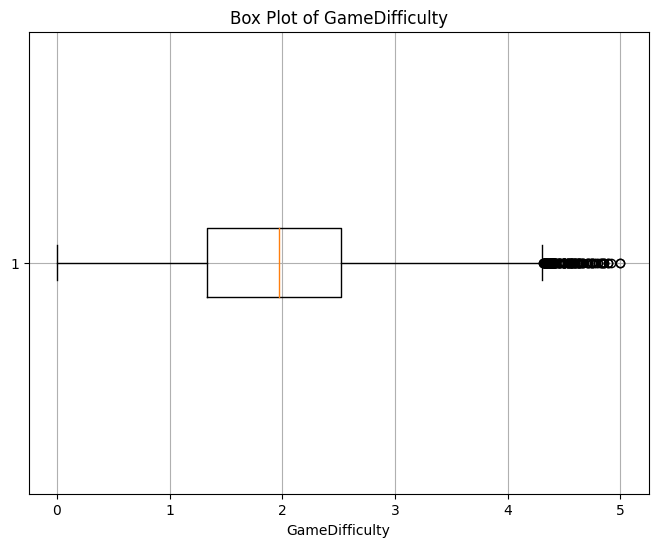

In [61]:
import matplotlib.pyplot as plt

# Specify the column you want to create a box plot for
column_name = 'GameDifficulty'  # You can change this to any column you want to analyze

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_games[column_name], vert=False)
plt.title('Box Plot of ' + column_name)
plt.xlabel(column_name)
plt.grid(True)
plt.show()

<b> df_game without outliers </b>

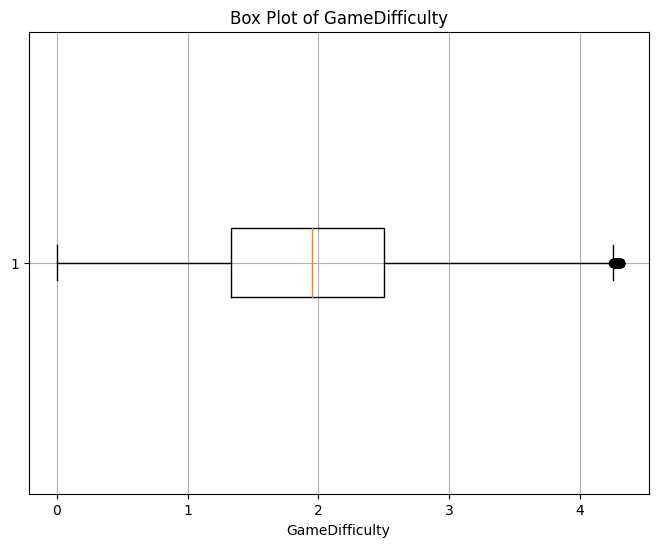

In [62]:
import matplotlib.pyplot as plt

# Specify the column you want to create a box plot for
column_name = 'GameDifficulty'  # You can change this to any column you want to analyze

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_games_no_outliers[column_name], vert=False)
plt.title('Box Plot of ' + column_name)
plt.xlabel(column_name)
plt.grid(True)
plt.show()

21925 to 21791 rows with getting rid of GameWeight outliers = 134 rows to drop

### Implementing the new df_games

From now, df_games will be without its GameWeight outliers 

In [63]:
df_games = df_games_no_outliers.copy()

## Various Viz

### Games Weight distribution / frequency

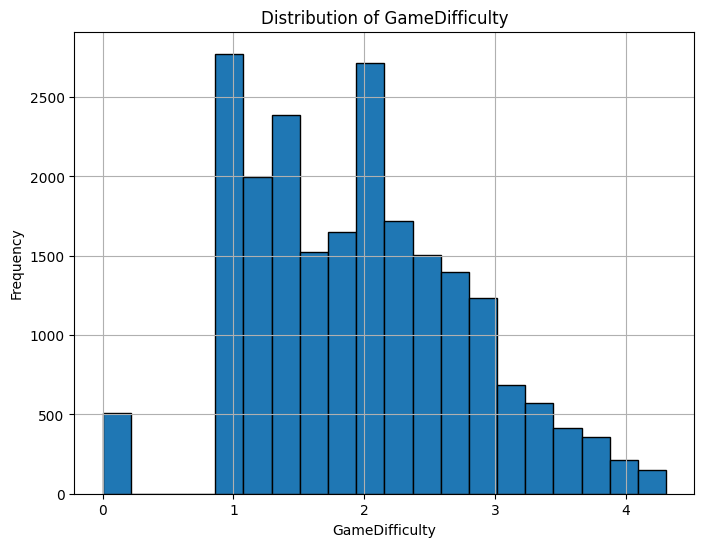

In [64]:
import matplotlib.pyplot as plt

# Specify the column you want to create a histogram for
column_name = 'GameDifficulty'  # You can change this to any column you want to analyze

# Create a histogram plot
plt.figure(figsize=(8, 6))
plt.hist(df_games[column_name], bins=20, edgecolor='black')
plt.title('Distribution of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

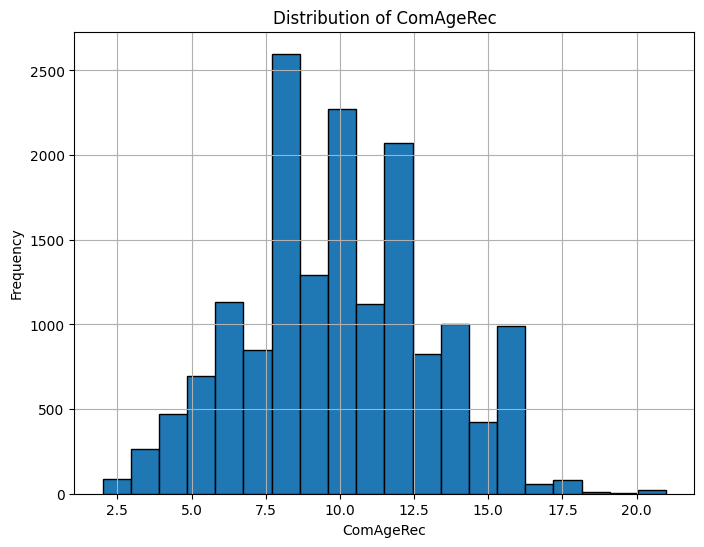

In [65]:
# Specify the column you want to create a histogram for
column_name = 'ComAgeRec'  # You can change this to any column you want to analyze

# Create a histogram plot
plt.figure(figsize=(8, 6))
plt.hist(df_games[column_name], bins=20, edgecolor='black')
plt.title('Distribution of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

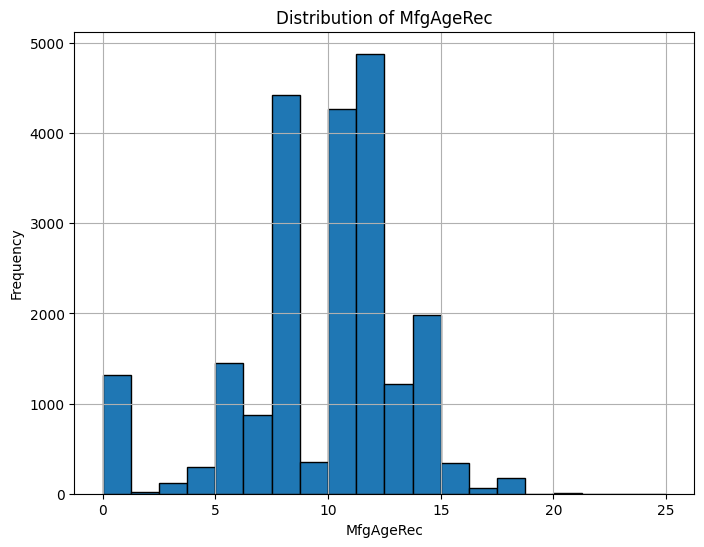

In [66]:
# Specify the column you want to create a histogram for
column_name = 'MfgAgeRec'  # You can change this to any column you want to analyze

# Create a histogram plot
plt.figure(figsize=(8, 6))
plt.hist(df_games[column_name], bins=20, edgecolor='black')
plt.title('Distribution of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Game Weight (difficulty) VS Average Rating scatter plot

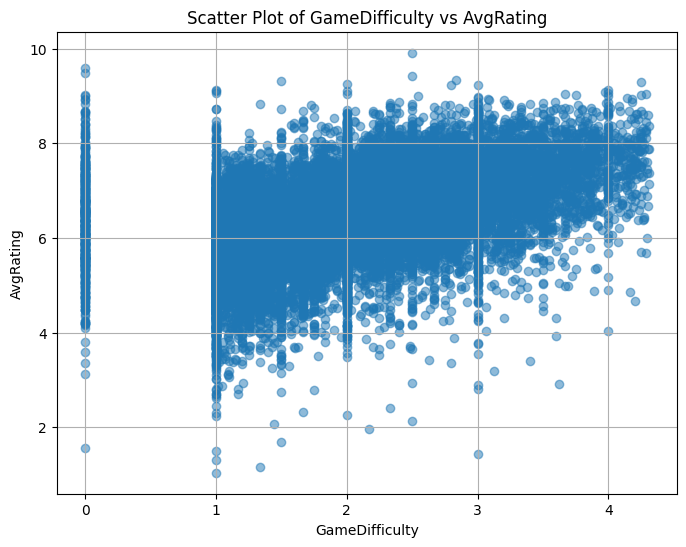

In [67]:
import matplotlib.pyplot as plt

# Specify the columns you want to create a scatter plot for
x_column = 'GameDifficulty'
y_column = 'AvgRating'  # You can change this to any other column you want to analyze

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_games[x_column], df_games[y_column], alpha=0.5)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

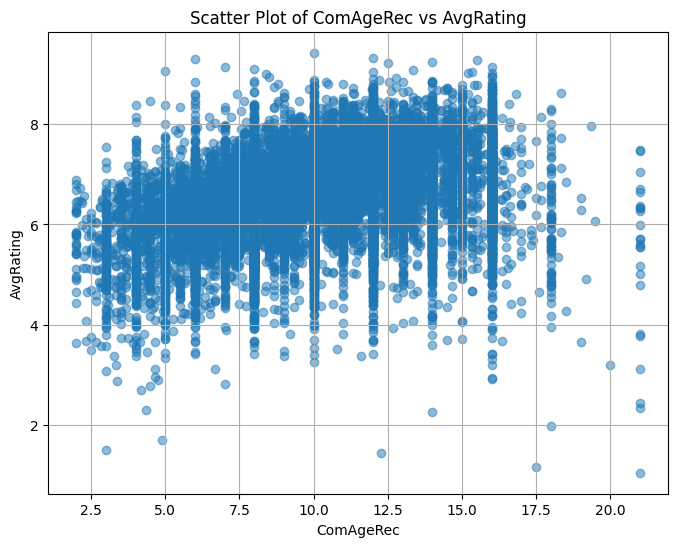

In [68]:
# Specify the columns you want to create a scatter plot for
x_column = 'ComAgeRec'
y_column = 'AvgRating'  # You can change this to any other column you want to analyze

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_games[x_column], df_games[y_column], alpha=0.5)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

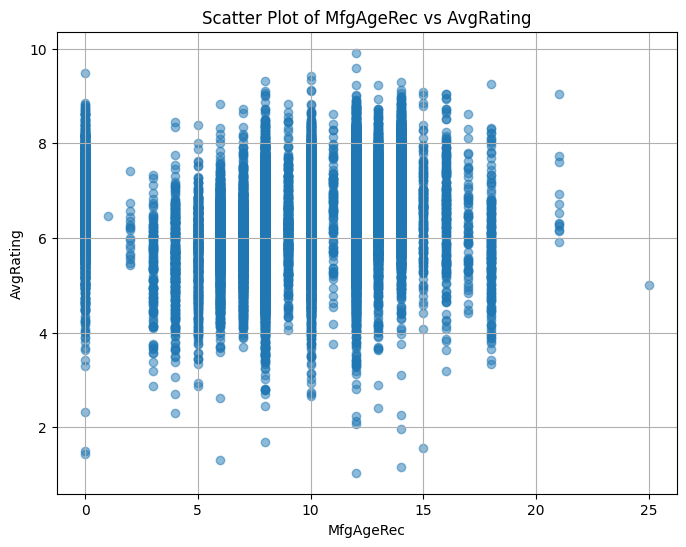

In [69]:
# Specify the columns you want to create a scatter plot for
x_column = 'MfgAgeRec'
y_column = 'AvgRating'  # You can change this to any other column you want to analyze

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_games[x_column], df_games[y_column], alpha=0.5)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

### Heatmap : Understanding the correlation between various elements

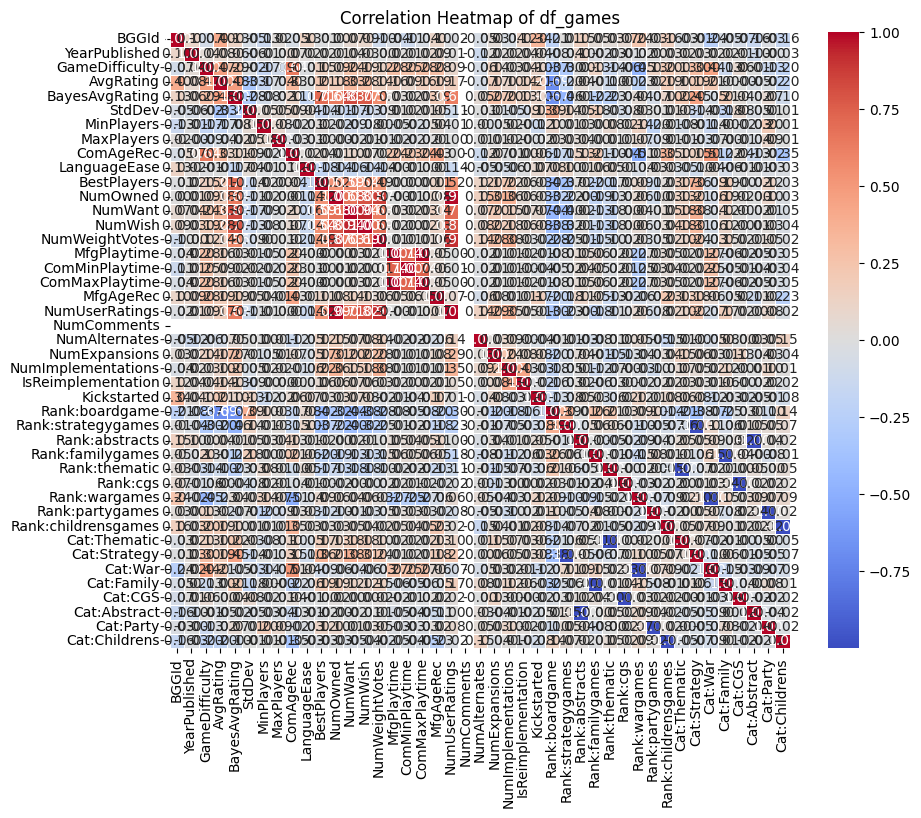

In [70]:
import seaborn as sns

# Exclude non-numeric columns from the correlation computation
numeric_columns = df_games.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of df_games')
plt.show()

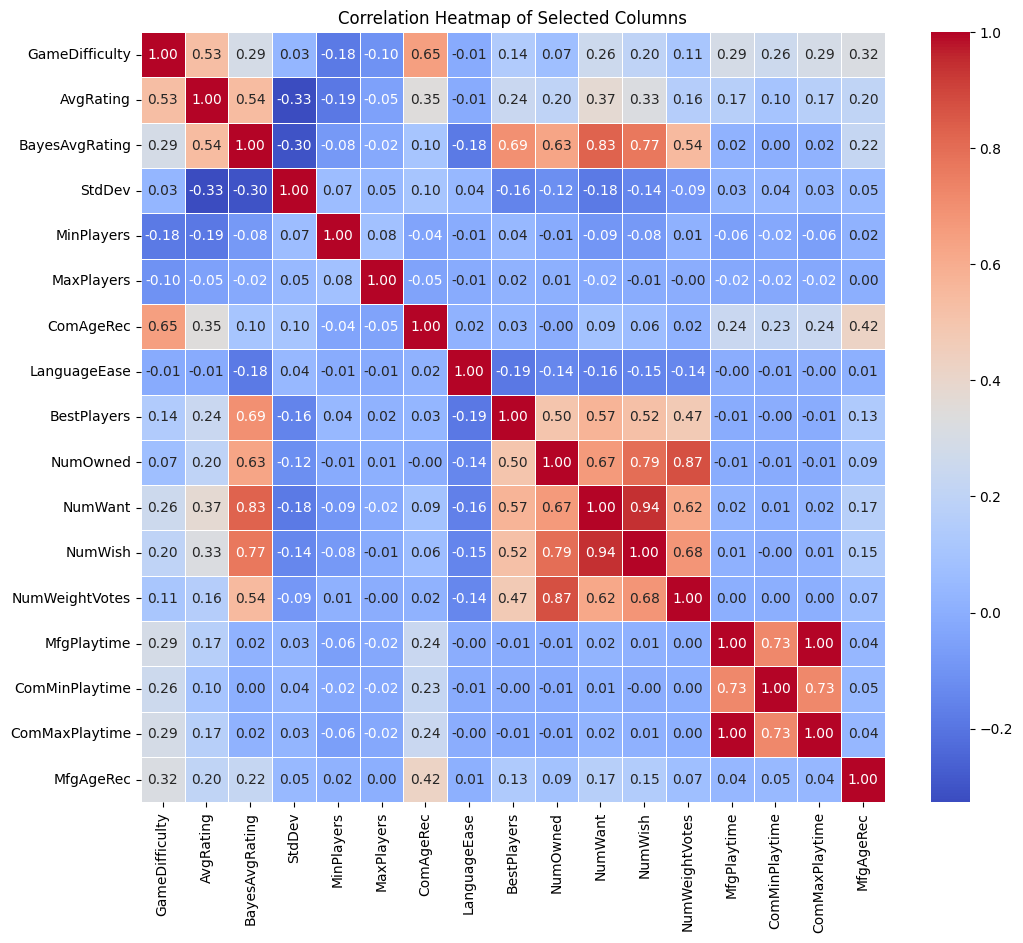

In [71]:
import seaborn as sns

# Specify the columns you want to include in the correlation heatmap
selected_columns = ['GameDifficulty', 'AvgRating', 'BayesAvgRating', 'StdDev', 
                    'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 
                    'BestPlayers', 'NumOwned', 'NumWant', 
                    'NumWish', 'NumWeightVotes', 'MfgPlaytime', 
                    'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec']

# Select the specified columns from the DataFrame
selected_df = df_games[selected_columns]

# Convert non-numeric values to NaN
selected_df = selected_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
selected_df = selected_df.dropna()

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

- Strong correlation (0.53) between difficulty and rating
- Strong (and logic) correlation between difficulty and ComAgeRec
- Quite surprisingly, the language ease deosn't semm to influence the rating or complexity
- <i> Doesn't tak into account the categorical variables (publisher, artist, mechanism, category, theme...) ! </i>

In [72]:
# Make the same by adding the categorical columns --> Will have to wait for the ML part !

# Cleaning

## Droping columns related to categories and ranking from df_games

In [73]:
# Now, let's drop the 'Cat:xxx' and 'Rank:xxx' columns:

# List comprehension to filter out columns not starting with 'Rank:' or 'Cat:'
columns_to_keep = [col for col in df_games.columns if not (col.startswith('Rank:') or col.startswith('Cat:'))]

# Drop the filtered columns from the DataFrame
df_games = df_games[columns_to_keep]

In [74]:
# Check the result:
display(df_games.head(2))

,BGGId,Name,Description,YearPublished,GameDifficulty,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,MfgAgeRec,NumUserRatings,NumComments,NumAlternates,NumExpansions,NumImplementations,IsReimplementation,Family,Kickstarted,ImagePath
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,12,562,0,0,0,2,1,NaN,0,https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,10,15146,0,6,0,1,0,Euro Classics (Reiner Knizia),0,https://cf.geekdo-images.com/o9-sNXmFS_TLAb7Zl...


## Cleaning rows having crazy values

In [75]:
#df_games shape before deleting crazy rows
df_games.shape

(21791, 31)

###  LanguageEase : drop rows values > 100

In [76]:
# Get the indices of rows where values in 'LanguageEase' column are greater than 100
indices_to_drop = df_games[df_games['LanguageEase'] > 100].index

# Drop rows with the specified indices
df_games.drop(indices_to_drop, inplace=True)

# Reset the index after dropping rows
df_games.reset_index(drop=True, inplace=True)


In [77]:
df_games.shape

(12975, 31)

### YearPublished: drop rows values < 1800

In [78]:
# Drop rows where values in 'YearPublished' column are less than 1800
#here we use a boolean mask
df_games = df_games[df_games['YearPublished'] >= 1800]

# Reset the index after dropping rows
df_games.reset_index(drop=True, inplace=True)


In [79]:
#df_games shape after deleting crazy rows
df_games.shape

(12785, 31)

## All dataframes: normalizing column names

In [80]:
# Define a function to normalize column names
def normalize_column_name(column_name):
    normalized_name = ''
    for i, char in enumerate(column_name):
        if i > 0 and char.isupper() and column_name[i-1].islower():
            normalized_name += '_' + char
        else:
            normalized_name += char
    return normalized_name.lower()

# List of all DataFrames
test = [df_games, df_categories, df_rankings, df_mechanics, df_themes, df_subcategories, df_artists, df_designers, df_publishers, df_user_ratings, df_ratings_distribution ]

# Loop through each DataFrame
for df in test:
    # Normalize column names
    df.columns = [normalize_column_name(col) for col in df.columns]

    # Print normalized column names
    print("DataFrame:", df)
    print("Normalized Column Names:", df.columns)
    print("\n")


DataFrame:         bggid                                      name  \
0           2                              Dragonmaster   
1           3                                   Samurai   
2           5                                   Acquire   
3           7                                 Cathedral   
4           9                              El Caballero   
...       ...                                       ...   
12780  346501                               Mille Fiori   
12781  346703                     7 Wonders: Architects   
12782  347146                                   Salvage   
12783  347521  Blitzkrieg!: World War Two in 20 Minutes   
12784  349131                                  Splitter   

                                             description  year_published  \
0      dragonmaster tricktaking card game base old ga...            1981   
1      samurai set medieval japan player compete gain...            1998   
2      acquire player strategically invest business 

In [81]:
#Column list
print(df_games.columns)

Index(['bggid', 'name', 'description', 'year_published', 'game_difficulty',
       'avg_rating', 'bayes_avg_rating', 'std_dev', 'min_players',
       'max_players', 'com_age_rec', 'language_ease', 'best_players',
       'good_players', 'num_owned', 'num_want', 'num_wish', 'num_weight_votes',
       'mfg_playtime', 'com_min_playtime', 'com_max_playtime', 'mfg_age_rec',
       'num_user_ratings', 'num_comments', 'num_alternates', 'num_expansions',
       'num_implementations', 'is_reimplementation', 'family', 'kickstarted',
       'image_path'],
      dtype='object')


In [82]:
#Column list
print(df_artists.columns)

Index(['bggid', 'artist'], dtype='object')


## Transforming all bggid to bgg_id

In [83]:
# List of dataframes
dataframes = [df_games, df_categories, df_rankings, df_mechanics, df_themes, df_subcategories, df_artists, df_designers, df_publishers, df_user_ratings, df_ratings_distribution]

# Iterate through each dataframe
for df in dataframes:
    # Check if the dataframe has a column named 'bggid'
    if 'bggid' in df.columns:
        # Rename the column to 'bgg_id'
        df.rename(columns={'bggid': 'bgg_id'}, inplace=True)

In [84]:
# Check if everything is OK:
for df in dataframes:
    # Print the first column name
    print(df.columns[0])

bgg_id
bgg_id
bgg_id
bgg_id
bgg_id
bgg_id
bgg_id
bgg_id
bgg_id
bgg_id
bgg_id


## Transforming 1/0 integers columns to binary (adding new_columns)

GAMES<br>
<br>	BGGId    &nbsp;&nbsp;&nbsp;&nbsp;   BoardGameGeek game ID
<br>	Name	&nbsp;&nbsp;&nbsp;&nbsp;		Name of game
<br>	Description		&nbsp;&nbsp;&nbsp;&nbsp;Description, stripped of punctuation and lemmatized
<br>	YearPublished	&nbsp;&nbsp;&nbsp;&nbsp;	First year game published
<br>	GameWeight	&nbsp;&nbsp;&nbsp;&nbsp;	Game difficulty/complexity
<br>	AvgRating	&nbsp;&nbsp;&nbsp;&nbsp;	Average user rating for game
<br>	BayesAvgRating	&nbsp;&nbsp;&nbsp;&nbsp;	Bayes weighted average for game (x # of average reviews applied)
<br>	StdDev		&nbsp;&nbsp;&nbsp;&nbsp;	Standard deviation of Bayes Avg
<br>	MinPlayers	&nbsp;&nbsp;&nbsp;&nbsp;	Minimum number of players
<br>	MaxPlayers	&nbsp;&nbsp;&nbsp;&nbsp;	Maximun number of players
<br>	ComAgeRec	&nbsp;&nbsp;&nbsp;&nbsp;	Community's recommended age minimum
<br>	LanguageEase	&nbsp;&nbsp;&nbsp;&nbsp;	Language requirement
<br>	BestPlayers	&nbsp;&nbsp;&nbsp;&nbsp;	Community voted best player count
<br>	GoodPlayers	&nbsp;&nbsp;&nbsp;&nbsp;	List of community voted good plater counts
<br>	NumOwned	&nbsp;&nbsp;&nbsp;&nbsp;	Number of users who own this game
<br>	NumWant		&nbsp;&nbsp;&nbsp;&nbsp;	Number of users who want this game
<br>	NumWish		&nbsp;&nbsp;&nbsp;&nbsp;	Number of users who wishlisted this game
<br>	NumWeightVotes	&nbsp;&nbsp;&nbsp;&nbsp;	? Unknown
<br>	MfgPlayTime	&nbsp;&nbsp;&nbsp;&nbsp;	Manufacturer Stated Play Time
<br>	ComMinPlaytime	&nbsp;&nbsp;&nbsp;&nbsp;	Community minimum play time
<br>	ComMaxPlaytime	&nbsp;&nbsp;&nbsp;&nbsp;	Community maximum play time
<br>	MfgAgeRec	&nbsp;&nbsp;&nbsp;&nbsp;	Manufacturer Age Recommendation
<br>	NumUserRatings	&nbsp;&nbsp;&nbsp;&nbsp;	Number of user ratings
<br>	NumComments	&nbsp;&nbsp;&nbsp;&nbsp;	Number of user comments
<br>	NumAlternates	&nbsp;&nbsp;&nbsp;&nbsp;	Number of alternate versions
<br>	NumExpansions	&nbsp;&nbsp;&nbsp;&nbsp;	Number of expansions
<br>	NumImplementations	&nbsp;&nbsp;&nbsp;&nbsp;Number of implementations
<br>	IsReimplementation &nbsp;&nbsp;&nbsp;&nbsp;	Binary - Is this listing a reimplementation? 
<br>	Family		&nbsp;&nbsp;&nbsp;&nbsp;	Game family
<br>	Kickstarted	&nbsp;&nbsp;&nbsp;&nbsp;	Binary - Is this a kickstarter?
<br>	ImagePath	&nbsp;&nbsp;&nbsp;&nbsp;	Image http:// path

In [85]:
df_games.head(2)

,bgg_id,name,description,year_published,game_difficulty,avg_rating,bayes_avg_rating,std_dev,min_players,max_players,...,mfg_age_rec,num_user_ratings,num_comments,num_alternates,num_expansions,num_implementations,is_reimplementation,family,kickstarted,image_path
0,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,12,562,0,0,0,2,1,NaN,0,https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...
1,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,10,15146,0,6,0,1,0,Euro Classics (Reiner Knizia),0,https://cf.geekdo-images.com/o9-sNXmFS_TLAb7Zl...


We must add new columns for IsReimplementation and Kickstarted

In [86]:
# Define a function to convert integer values to binary
def int_to_binary(value):
    return bin(value)[2:]  # Convert to binary and remove '0b' prefix

# Apply the function to create the new column
df_games['is_reimplementation_binary'] = df_games['is_reimplementation'].apply(lambda x: int_to_binary(x))
df_games['kickstarted_binary'] = df_games['kickstarted'].apply(lambda x: int_to_binary(x))

# Display the DataFrame to verify the new column
display(df_games.head(2))


,bgg_id,name,description,year_published,game_difficulty,avg_rating,bayes_avg_rating,std_dev,min_players,max_players,...,num_comments,num_alternates,num_expansions,num_implementations,is_reimplementation,family,kickstarted,image_path,is_reimplementation_binary,kickstarted_binary
0,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,0,0,0,2,1,NaN,0,https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...,1,0
1,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,0,6,0,1,0,Euro Classics (Reiner Knizia),0,https://cf.geekdo-images.com/o9-sNXmFS_TLAb7Zl...,0,0


In [87]:
# Map 0 to False and 1 to True in the 'IsReimplementation' column
df_games['is_reimplementation_binary2'] = df_games['is_reimplementation'].map({0: False, 1: True})

# Display the DataFrame to verify the new column
display(df_games.head(3))

,bgg_id,name,description,year_published,game_difficulty,avg_rating,bayes_avg_rating,std_dev,min_players,max_players,...,num_alternates,num_expansions,num_implementations,is_reimplementation,family,kickstarted,image_path,is_reimplementation_binary,kickstarted_binary,is_reimplementation_binary2
0,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,0,0,2,1,NaN,0,https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...,1,0,True
1,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,6,0,1,0,Euro Classics (Reiner Knizia),0,https://cf.geekdo-images.com/o9-sNXmFS_TLAb7Zl...,0,0,False
2,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,6,2,0,0,3M Bookshelf,0,https://cf.geekdo-images.com/3C--kJRhi6kTPHsr9...,0,0,False


In [88]:
# Map 0 to False and 1 to True in the 'Kickstarted' column
df_games['kickstarted_binary2'] = df_games['kickstarted'].map({0: False, 1: True})

# Display the DataFrame to verify the new column
display(df_games.head(1))

,bgg_id,name,description,year_published,game_difficulty,avg_rating,bayes_avg_rating,std_dev,min_players,max_players,...,num_expansions,num_implementations,is_reimplementation,family,kickstarted,image_path,is_reimplementation_binary,kickstarted_binary,is_reimplementation_binary2,kickstarted_binary2
0,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.963,6.64537,5.78447,1.4544,3,4,...,0,2,1,NaN,0,https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...,1,0,True,False


## Remove duplicates

In [89]:
# df_games size BEFORE removal
print(df_games.shape)

# Remove duplicate rows from the DataFrame
df_games = df_games.drop_duplicates()

# df_games size AFTER removal
print(df_games.shape)

(12785, 35)
(12785, 35)


Like shown before above, there is no duplicate rows so no difference

## Handles NaNs

In [90]:
# df_games size BEFORE dropna()
print(df_games.shape)


# Remove rows that are entirely null
df_games = df_games.dropna(how='all')

# df_games size AFTER dropna()
print(df_games.shape)

(12785, 35)
(12785, 35)


## Remove useless columns

In [91]:
print(df_games.shape)

(12785, 35)


In [92]:
# Remove 'family', 'image_path' and 'good_players' columns
df_games.drop(columns=['family', 'image_path', 'good_players'], inplace=True)

In [93]:
print(df_games.shape)

(12785, 32)


## Floats to integers

### ages columns

In [94]:
# transforming age columns to integers:

# Replace NaN values with a default value (e.g., 0) in 'com_age_rec' and 'mfg_age_rec' columns
df_games['com_age_rec'].fillna(0, inplace=True)
df_games['mfg_age_rec'].fillna(0, inplace=True)

# Convert 'com_age_rec' and 'mfg_age_rec' columns from float to integer
df_games['com_age_rec'] = df_games['com_age_rec'].astype(int)
df_games['mfg_age_rec'] = df_games['mfg_age_rec'].astype(int)


In [95]:
# df_games['com_age_rec']
display(df_games[['mfg_age_rec', 'com_age_rec']])

print (df_games[['mfg_age_rec', 'com_age_rec']].dtypes)

,mfg_age_rec,com_age_rec
0,12,0
1,10,9
2,12,11
3,8,8
4,13,11
...,...,...
12780,10,9
12781,8,6
12782,10,12
12783,14,16


mfg_age_rec    int32
com_age_rec    int32
dtype: object


## Outliers handling / removing

Done already during the box plot part when vizualizing the game_weight (= game difficulty)

## saving the final df_games to csv

In [96]:
df_games.shape

(12785, 32)

In [97]:
# Save DataFrame to a CSV file
df_games.to_csv('df_games.csv', index=False)


# Connecting to MySQL + generate the tables

## Creating the connection

In [98]:
import pandas as pd
from sqlalchemy import create_engine, text
import pymysql.cursors
import os
import getpass
import urllib.parse

<b>pymysql</b> .cursors : for connecting to MySQL database. <br>
<b>os</b> : for interacting with the operating system. <br>
<b>urllib.parse</b> : for URL encoding



In [99]:
pw_raw = 'Silver57' #os.getenv('ironhack') (--> suggests an attempt to retrieve the password from an environment variable named 'ironhack')
pw = urllib.parse.quote_plus(pw_raw)

In [100]:

# --> This line constructs a connection string for MySQL database. 
# It includes the username ('root'), encoded password (pw), host ('localhost'), port number ('3306'), 
# and the name of the database ('bgg').

connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/bgg'


# It creates a database engine using the connection string created earlier. 
# The engine is an interface to the database that allows executing SQL queries.
engine = create_engine(connection_string)

In [105]:
# Data Insertion:
df_games.to_sql('games', engine, 'bgg', if_exists='replace', index=False)

C:\Users\micel\AppData\Local\Temp\ipykernel_15904\4223941043.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_sql except for the arguments 'name' and 'con' will be keyword-only.
  df_games.to_sql('games', engine, 'bgg', if_exists='replace', index=False)


12785

In [102]:
# df_categories.to_sql('categories', engine, 'bgg', if_exists='replace', index=False)
# df_rankings.to_sql('rankings', engine, 'bgg', if_exists='replace', index=False)
#df_mechanics.to_sql('mechanics', engine, 'bgg', if_exists='replace', index=False)
# df_themes.to_sql('themes', engine, 'bgg', if_exists='replace', index=False)
# df_subcategories.to_sql('subcategories', engine, 'bgg', if_exists='replace', index=False)
# df_artists.to_sql('artists', engine, 'bgg', if_exists='replace', index=False)
# df_designers.to_sql('designers', engine, 'bgg', if_exists='replace', index=False)
# df_publishers.to_sql('publishers', engine, 'bgg', if_exists='replace', index=False)

# --> ISSUE !
# df_user_ratings.to_sql('user_ratings', engine, 'bgg', if_exists='replace', index=False)


# df_ratings_distribution.to_sql('ratings_distribution', engine, 'bgg', if_exists='replace', index=False)

The following should be working if we forget about the df_user_ratings:

In [104]:
# Looping to repeat the process for all the other dataframes

#listing all the dataframes:
dataframes = {
    'games' : df_games,
    'categories': df_categories,
    'mechanics': df_mechanics,
    'themes': df_themes,
    'subcategories' : df_subcategories,
    'rankings' : df_rankings,
    'artists' : df_artists,
    'designers' : df_designers,
    'publishers' : df_publishers,
    #'user_ratings': df_user_ratings,
    'ratings_distribution' : df_ratings_distribution
}

# Looping to send them all as tables on MySQL:
for table_name, df in dataframes.items():
#    pw_raw = 'Silver57' #os.getenv('ironhack') (--> suggests an attempt to retrieve the password from an environment variable named 'ironhack')
#    pw = urllib.parse.quote_plus(pw_raw)
#    connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/bgg'
#    engine = create_engine(connection_string)
    
    df.to_sql(table_name, engine, 'bgg', if_exists='replace', index=False)

C:\Users\micel\AppData\Local\Temp\ipykernel_15904\3407574160.py:25: FutureWarning: Starting with pandas version 3.0 all arguments of to_sql except for the arguments 'name' and 'con' will be keyword-only.
  df.to_sql(table_name, engine, 'bgg', if_exists='replace', index=False)
